In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import jax
#jax.config.update('jax_platform_name', 'cpu')

In [10]:
from entot.plotting.plots import plot_1D, plot_images
from entot.models.models import KantorovichGapModel
from entot.models.utils import MixtureNormalSampler
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import tensorflow as tf
from numpy import genfromtxt
from entot.nets.nets import UNet

In [4]:
mnist = tf.keras.datasets.mnist.load_data()[1][0]

In [27]:
mnist.shape

(10000, 28, 28)

In [74]:
mnist_resized = tf.image.resize(mnist[...,None], (32, 32))
mnist_resized = jnp.array(mnist_resized, dtype=jnp.float32) / 255.

In [11]:
my_data = genfromtxt('/home/dominikk/data/handwritten_data.csv', delimiter=',')

In [75]:
alphabet = np.reshape(my_data[:10_000,:-1], (10_000, 28, 28))
alphabet_resized = tf.image.resize(alphabet[...,None], (32, 32))
alphabet_resized = jnp.array(alphabet_resized, dtype=jnp.float32) / 255.

In [76]:
my_data_reshaped = np.reshape(my_data[:,:-1], (-1, 28, 28))
rng = jax.random.PRNGKey(0)
random_indices = jax.random.choice(rng, len(my_data_reshaped), shape=(10_000,), replace=False)
alphabet_reduced = my_data_reshaped[random_indices]
alphabet_resized = tf.image.resize(alphabet_reduced[...,None], (32, 32))

In [1]:
plt.imshow(alphabet_resized[1,...])

NameError: name 'plt' is not defined

In [77]:
alphabet_resized.shape, mnist_resized.shape

(TensorShape([10000, 32, 32, 1]), (10000, 32, 32, 1))

In [158]:
neural_net = UNet(diff_input_output=1, base_factor=8)

In [160]:
kg = KantorovichGapModel(epsilon_kant_gap=1e-3, input_dim=[32,32, 1], noise_dim=1, neural_net=neural_net, callback=plot_images, k_noise_per_x=2, iterations=1000, callback_iters=1)

[nan nan nan nan nan nan nan nan nan nan]
[0 0]


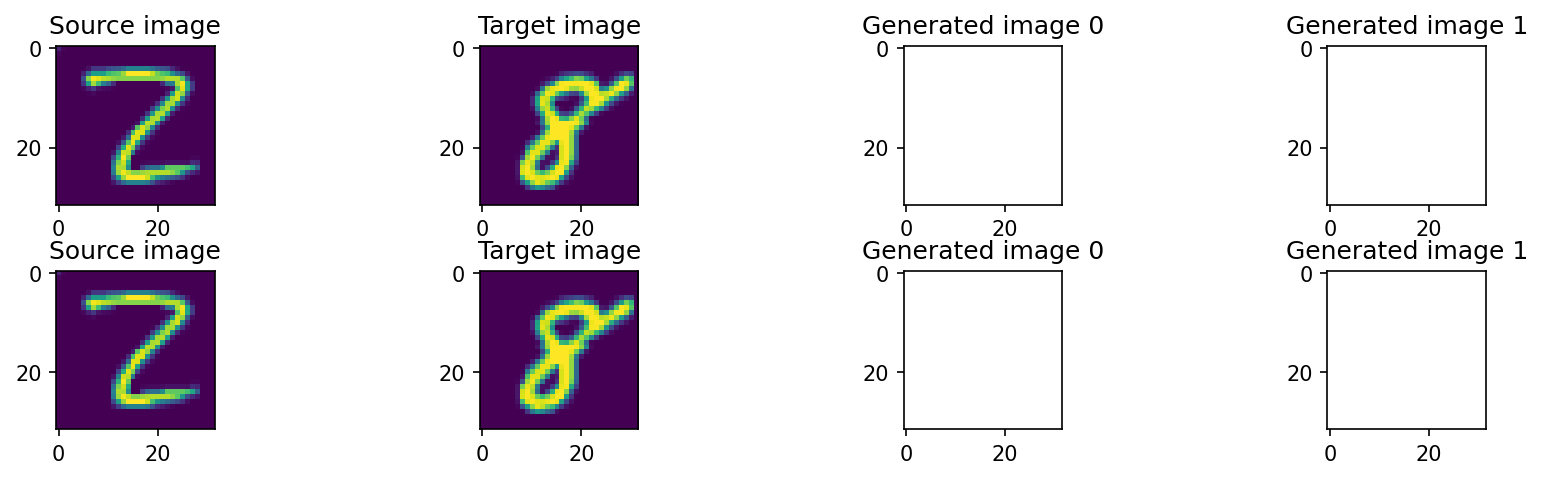

  0%|          | 1/1000 [01:42<28:24:29, 102.37s/it]


KeyboardInterrupt: 

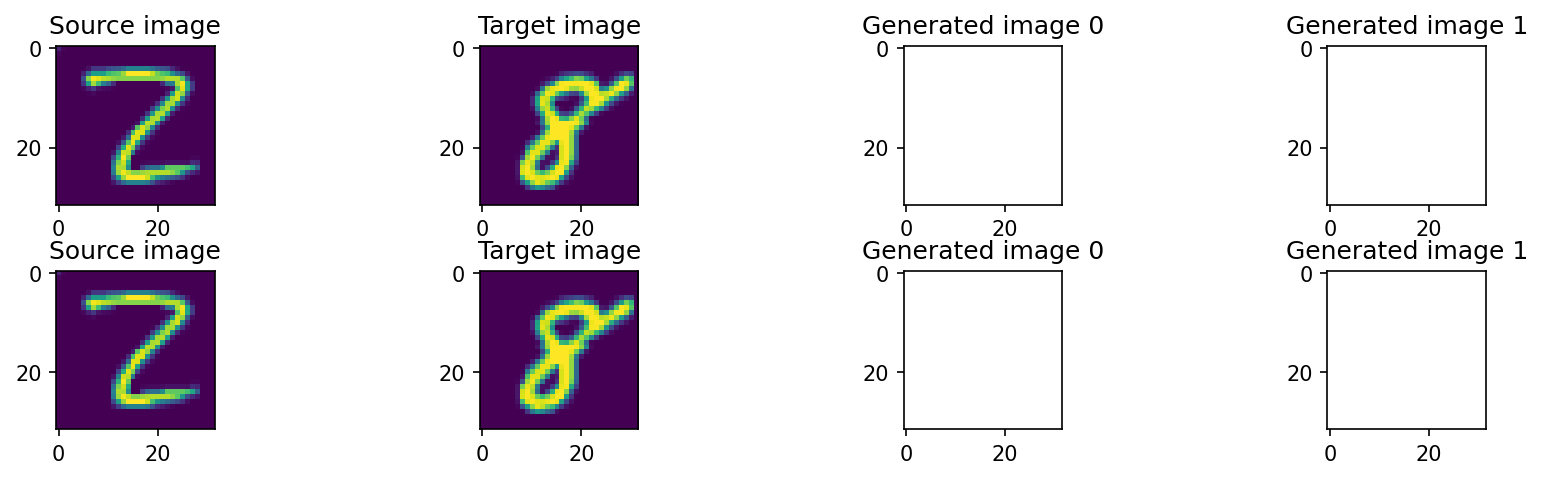

In [161]:
kg(alphabet_resized, mnist_resized, 64, 64)

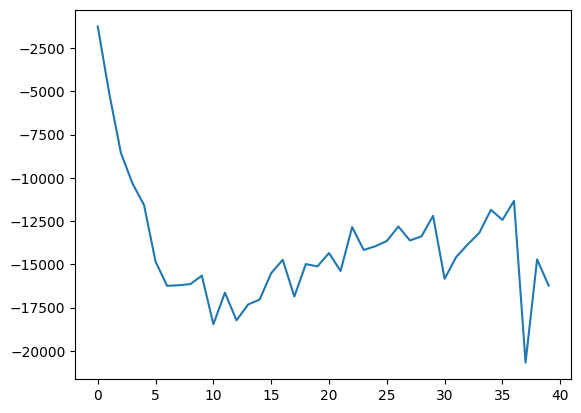

In [25]:
plt.plot(np.arange(len(kg.metrics["kant_gap"])), kg.metrics["kant_gap"])

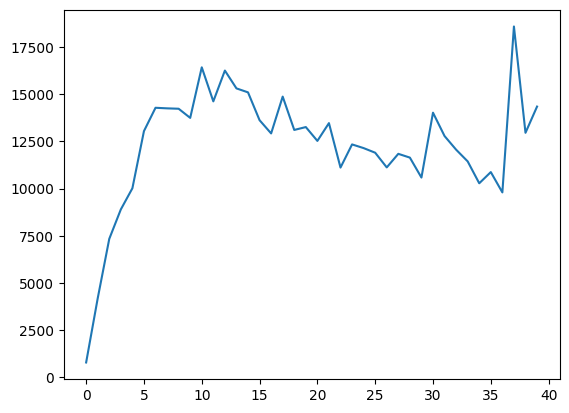

In [26]:
plt.plot(np.arange(len(kg.metrics["fitting_loss"])), kg.metrics["fitting_loss"])